In [57]:
import baostock as bs
import pandas as pd

# 登陆系统
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

# 获取货币供应量
rs = bs.query_money_supply_data_month(start_date="2010-01", end_date="2025-02")
print('query_money_supply_data_month respond error_code:'+rs.error_code)
print('query_money_supply_data_month respond  error_msg:'+rs.error_msg)

# 打印结果集
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)
# 结果集输出到csv文件
print(result.tail())

# 登出系统
bs.logout()

login success!
login respond error_code:0
login respond  error_msg:success
query_money_supply_data_month respond error_code:0
query_money_supply_data_month respond  error_msg:success
    statYear statMonth        m0Month      m0YOY m0ChainRelative  \
177     2024        10  122447.040000  12.800000        0.506476   
178     2024        11  124180.260000  12.700000        1.415485   
179     2024        12  128194.160000  13.000000        3.232317   
180     2025        01  142254.480000  17.200000       10.967988   
181     2025        02  132756.610000   9.700000       -6.676675   

            m1Month      m1YOY m1ChainRelative         m2Month     m2YOY  \
177  1054884.000000  -2.300000       -0.049838  3097092.010000  7.500000   
178  1076379.000000  -0.700000        2.037665  3119587.270000  7.100000   
179  1113069.000000   1.200000        3.408651  3135322.300000  7.300000   
180  1124457.450000   0.400000        1.023158  3185247.180000  7.000000   
181  1094370.010000   0.1000

In [64]:
import matplotlib.pyplot as plt

df = result[['m1ChainRelative', 'm2ChainRelative','statYear']]

df['Month'] = result['statYear'].astype(str) + '/' + result['statMonth'].astype(str)

df['m2ChainRelative'] = pd.to_numeric(df['m2ChainRelative'], errors='coerce')
df['m1ChainRelative'] = pd.to_numeric(df['m1ChainRelative'], errors='coerce')
df['m1m2delta'] = df['m1ChainRelative'] - df['m2ChainRelative']
# 使用DataFrame.plot()绘制折线图
# 显示图表


/var/folders/p6/9brysvpx31z43ghh4_0j9qb40000gn/T/ipykernel_78924/89469048.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = result['statYear'].astype(str) + '/' + result['statMonth'].astype(str)
/var/folders/p6/9brysvpx31z43ghh4_0j9qb40000gn/T/ipykernel_78924/89469048.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['m2ChainRelative'] = pd.to_numeric(df['m2ChainRelative'], errors='coerce')
/var/folders/p6/9brysvpx31z43ghh4_0j9qb40000gn/T/ipykernel_78924/89469048.py:8: SettingWithCopyWa

In [65]:
invalid_data = df[df['m2ChainRelative'].isna()]
invalid_data

,m1ChainRelative,m2ChainRelative,statYear,Month,m1m2delta


/var/folders/p6/9brysvpx31z43ghh4_0j9qb40000gn/T/ipykernel_78924/3015307392.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df['Month'])
/var/folders/p6/9brysvpx31z43ghh4_0j9qb40000gn/T/ipykernel_78924/3015307392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = pd.to_datetime(df['Month'])


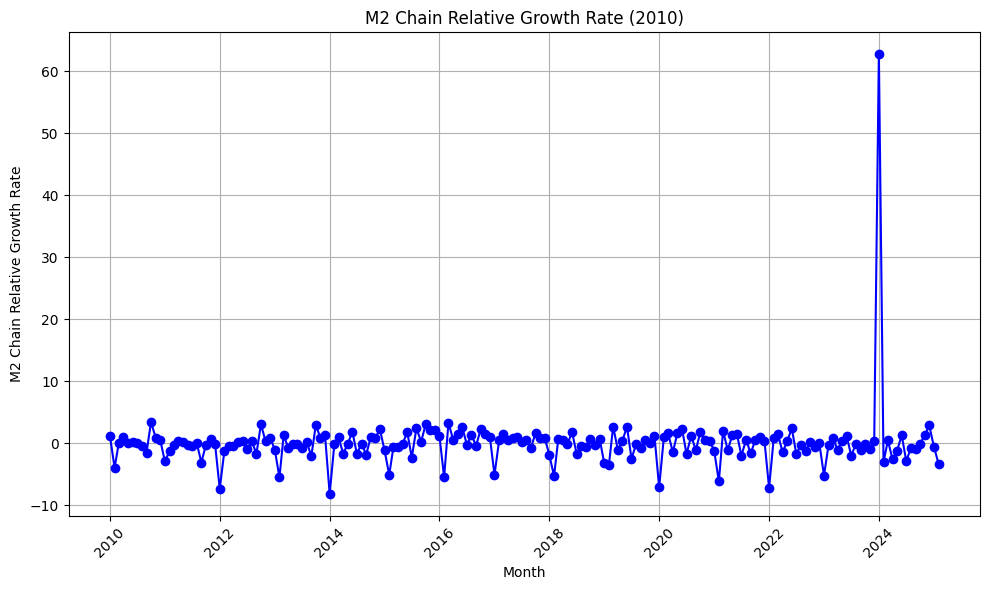

In [ ]:
# 绘制折线图
df['Month'] = pd.to_datetime(df['Month'])


plt.figure(figsize=(10, 6))  # 设置图形大小

plt.plot(df['Month'], df['m1m2delta'], marker='o', linestyle='-', color='b')  # 绘制折线图


# 添加标题和标签
plt.title('M1-M2 Chain Relative Growth Rate (2010)')  # 添加标题
plt.xlabel('Month')  # 添加X轴标签
plt.ylabel('M1-M2 Chain Relative Growth Rate')  # 添加Y轴标签

# 添加网格
plt.grid(True)

# 优化X轴标签显示
plt.xticks(rotation=45)  # 旋转X轴标签，避免重叠

# 显示图表
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   m2ChainRelative  10 non-null     object        
 1   statYear         10 non-null     object        
 2   Month            10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 368.0+ bytes
